## Setup

In [1]:
home <- "/home/workspace"
path <- "pbmc_flow/data/NDMM PM1 data - Statistics (1) (1).csv"
util <- "pbmc_flow/utils.R"
cross_sectional_util <- "pbmc_flow/notebooks/flu_responder_cross_sectional/cross_sectional_utils.R"

source(file.path(home, util))
source(file.path(home, cross_sectional_util))

plot_path <- file.path(home, "pbmc_flow/plots/flu_response_cross_sectional_composition/myeloid")
dir.create(plot_path, recursive = TRUE, showWarnings = FALSE)

celltypes <- c(
    "Classical Monocytes",
    "Neutrophils",
    "Intermediate Monocytes",
    "Non classical monocytes",
    "CD56 hi",
    "CD56 lo",
    "CD16+ CD56 lo",
    "Plasmacytoid DC",
    "cDC1",
    "cDC2",
    "DN DC"
)

df <- read.csv(file.path(home, path))

df <- process_data(
    df,
    subject_col = "Subject",
    visit_col = "Visit",
    population_col = "population",
    percent_of_col = "percentOf",
    percent_col = "percent",
    plate_col = "plate",
    celltypes = celltypes,
    viable_filter = "Total Viable cells"
)

result <- freq_clr(
    freq_table = df,
    sample_col = "Sample_ID",
    freq_col = "frequency", 
    celltype_col = "population"
)

result$population <- factor(result$population, levels = celltypes)

# write.csv(result, "/home/workspace/pbmc_flow/data/tcell_composition_clr_results.csv", row.names = FALSE)

$`Flu Year 1 Day 0`

$`Flu Year 1 Day 7`


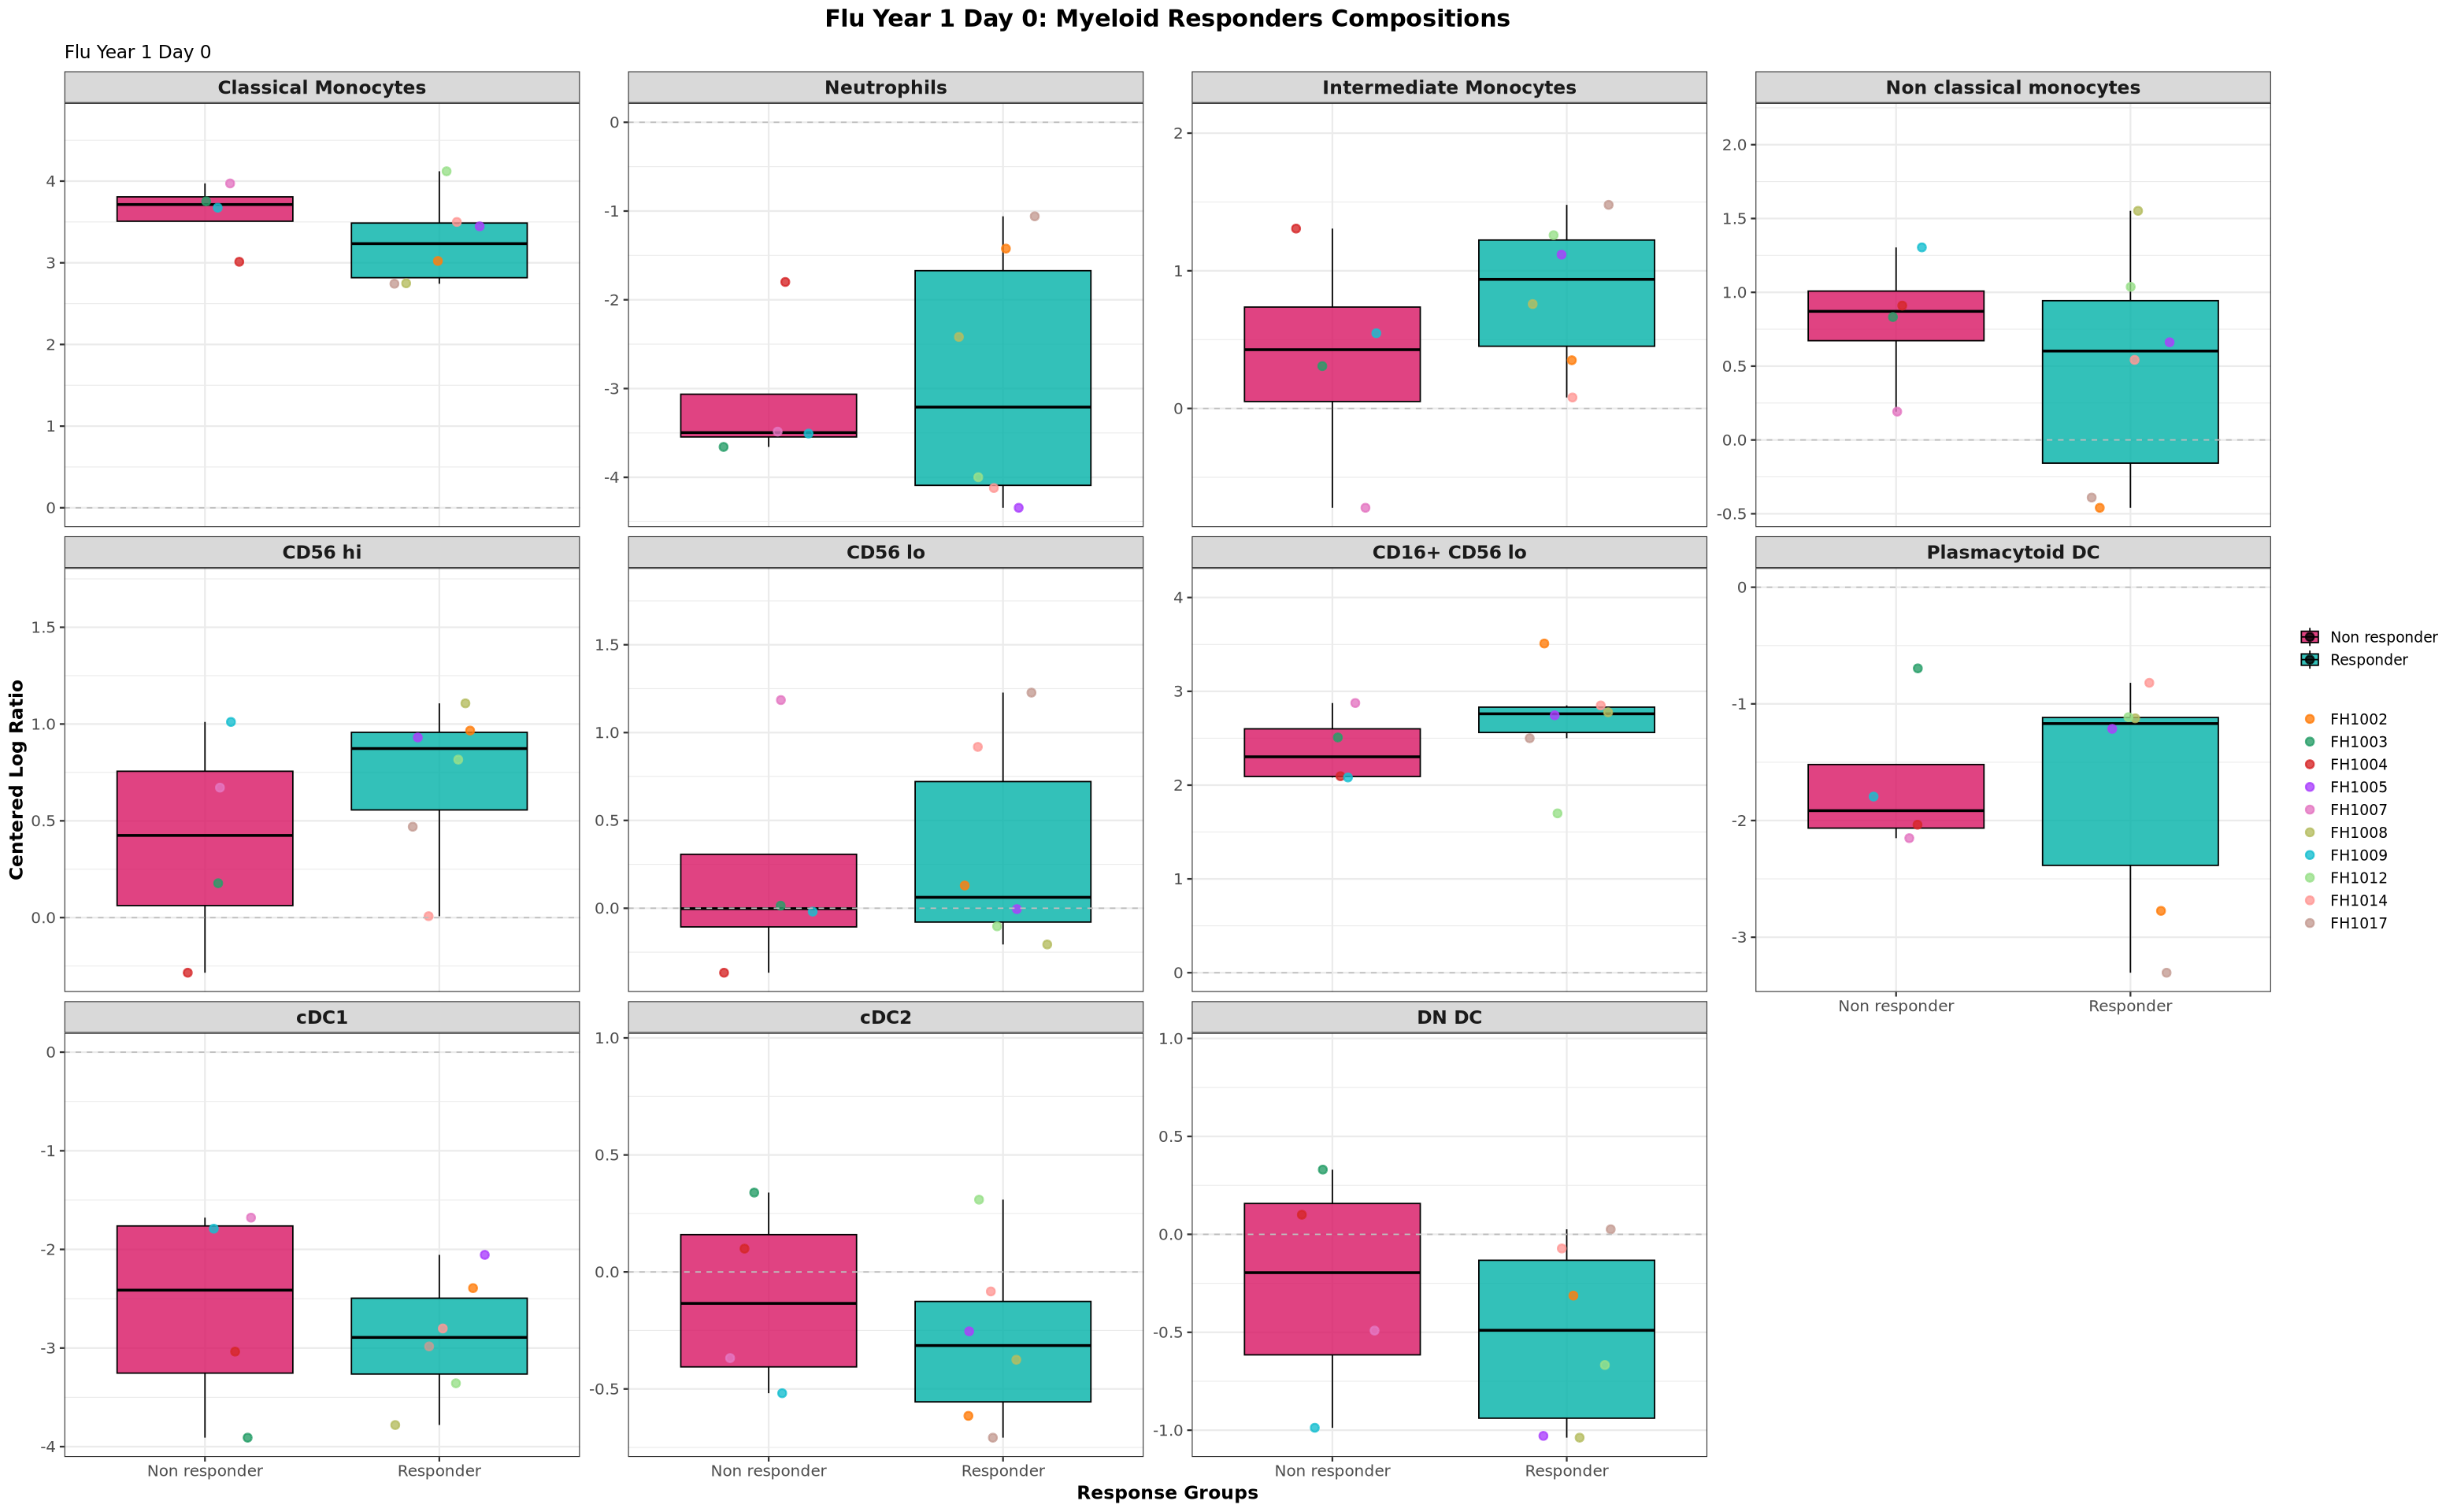


$`Flu Year 1 Day 90`


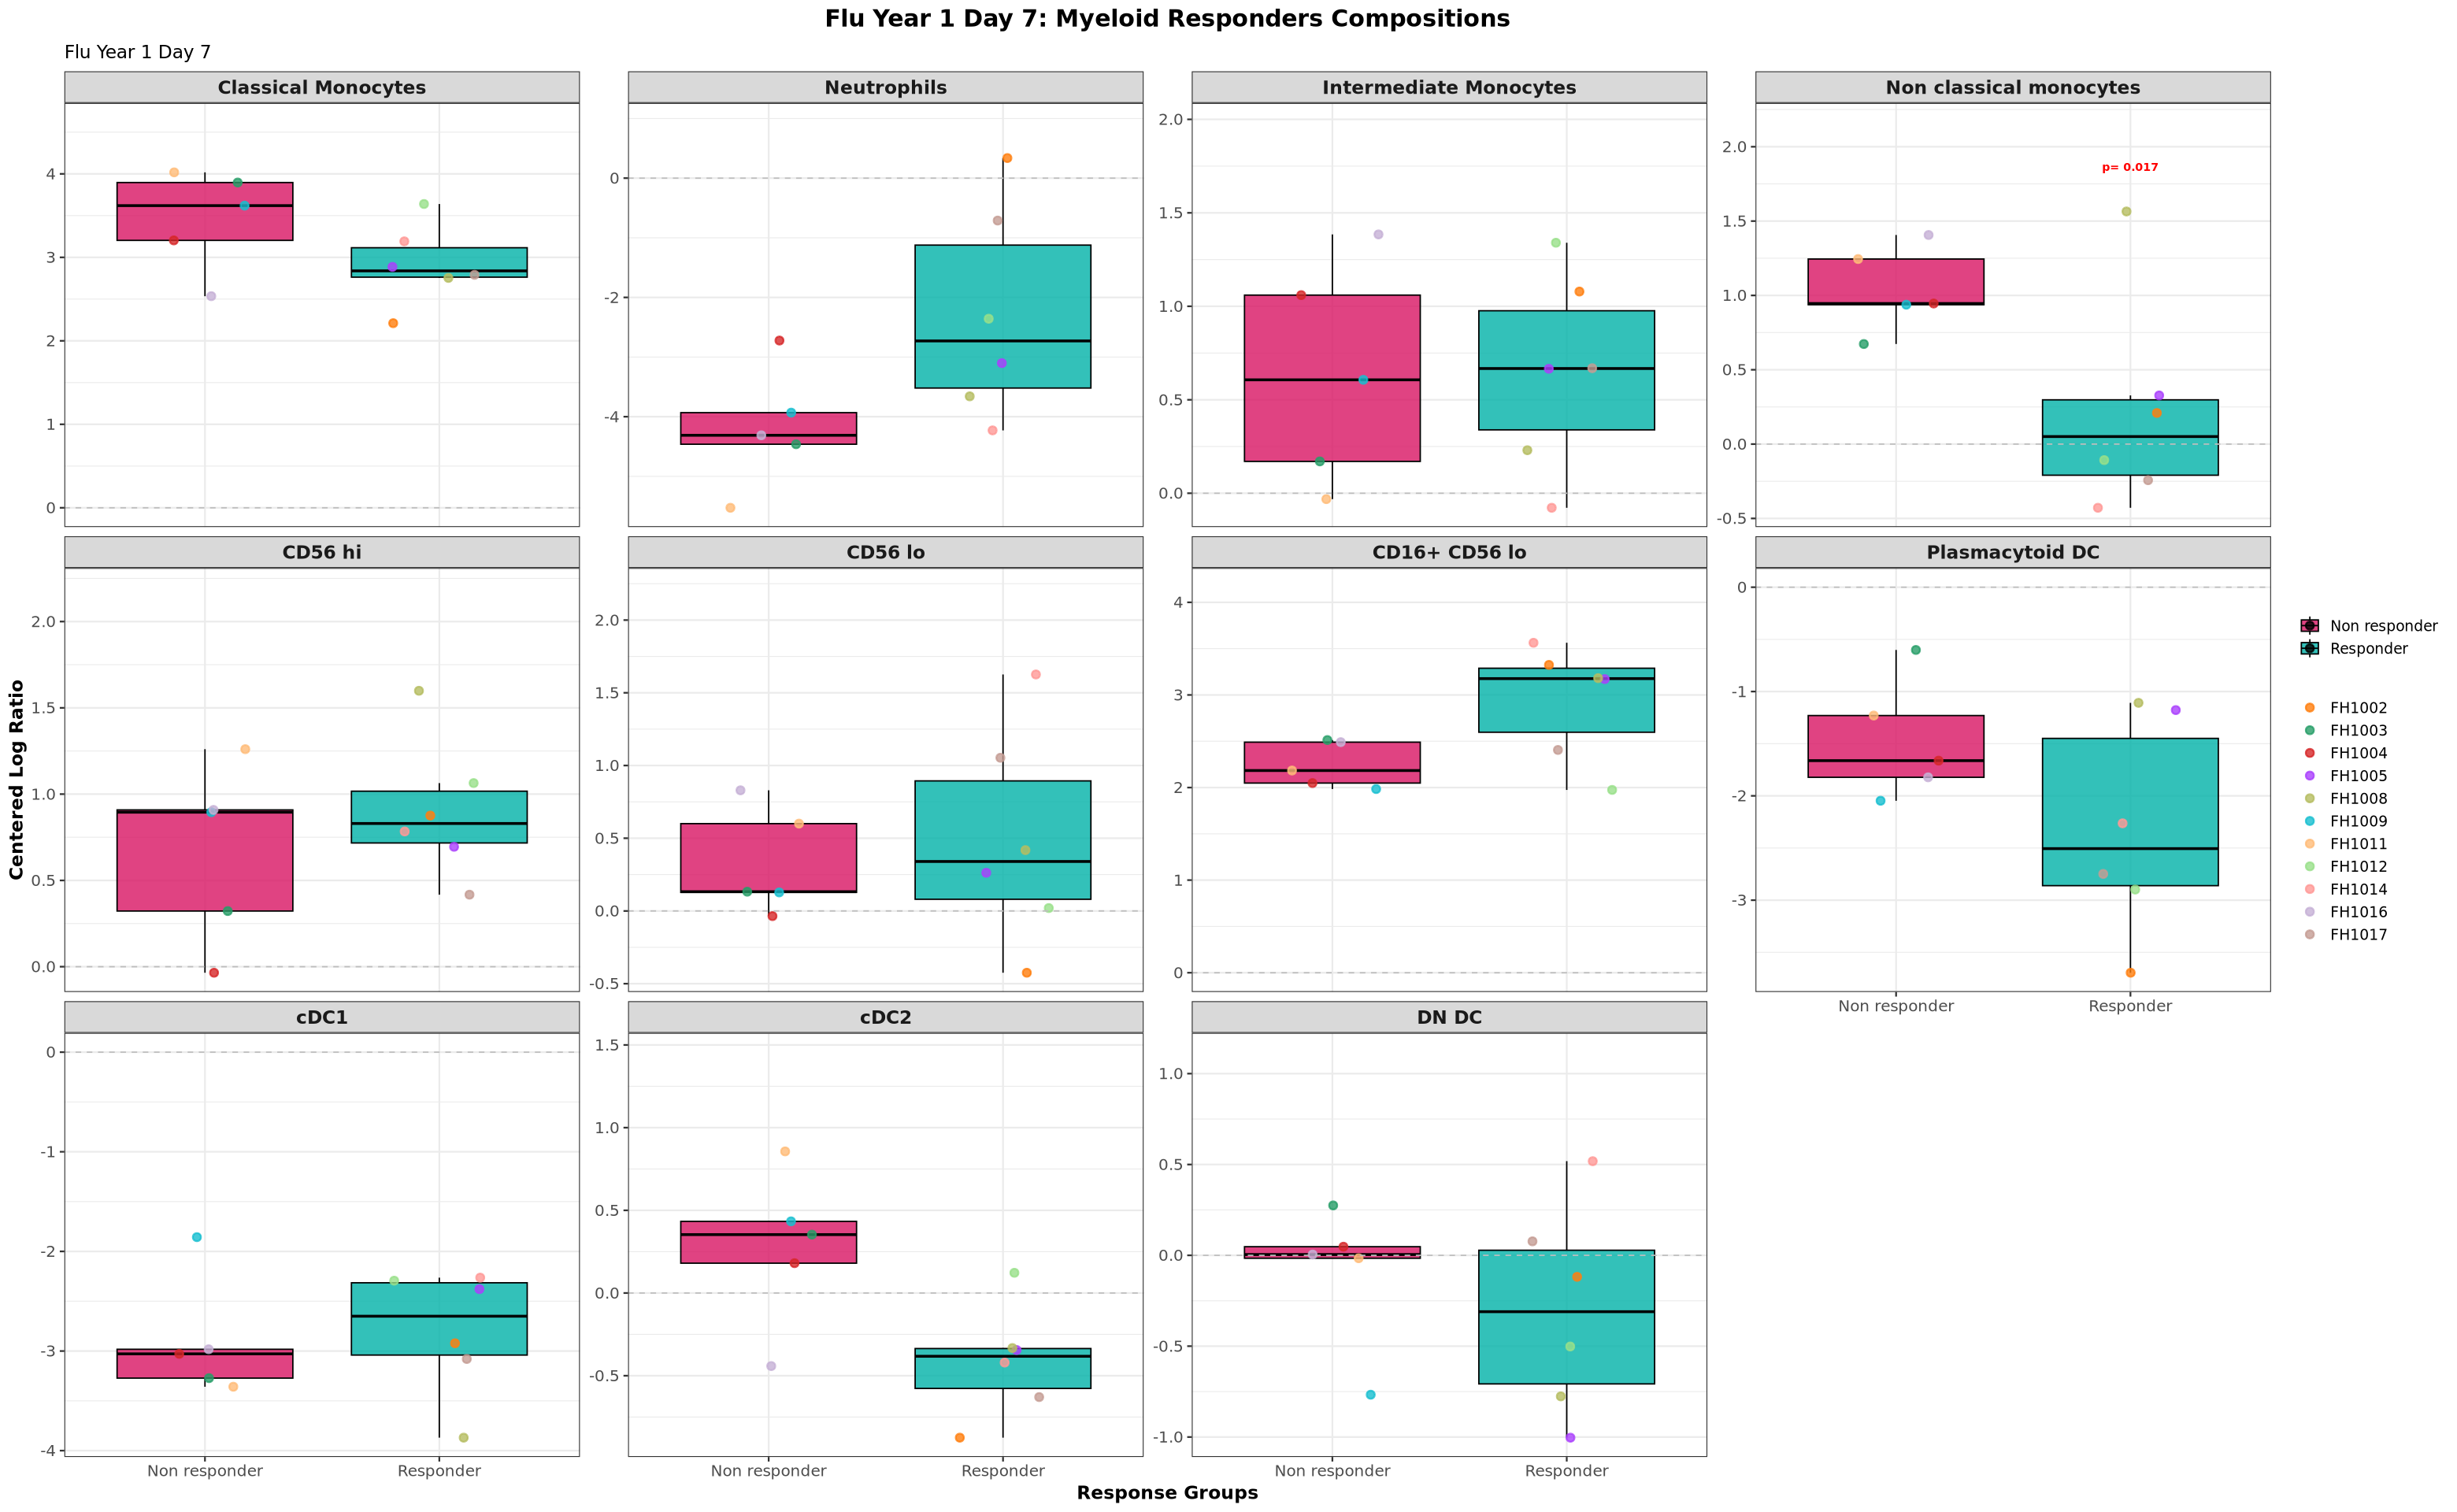


$`Flu Year 1 Stand-Alone`


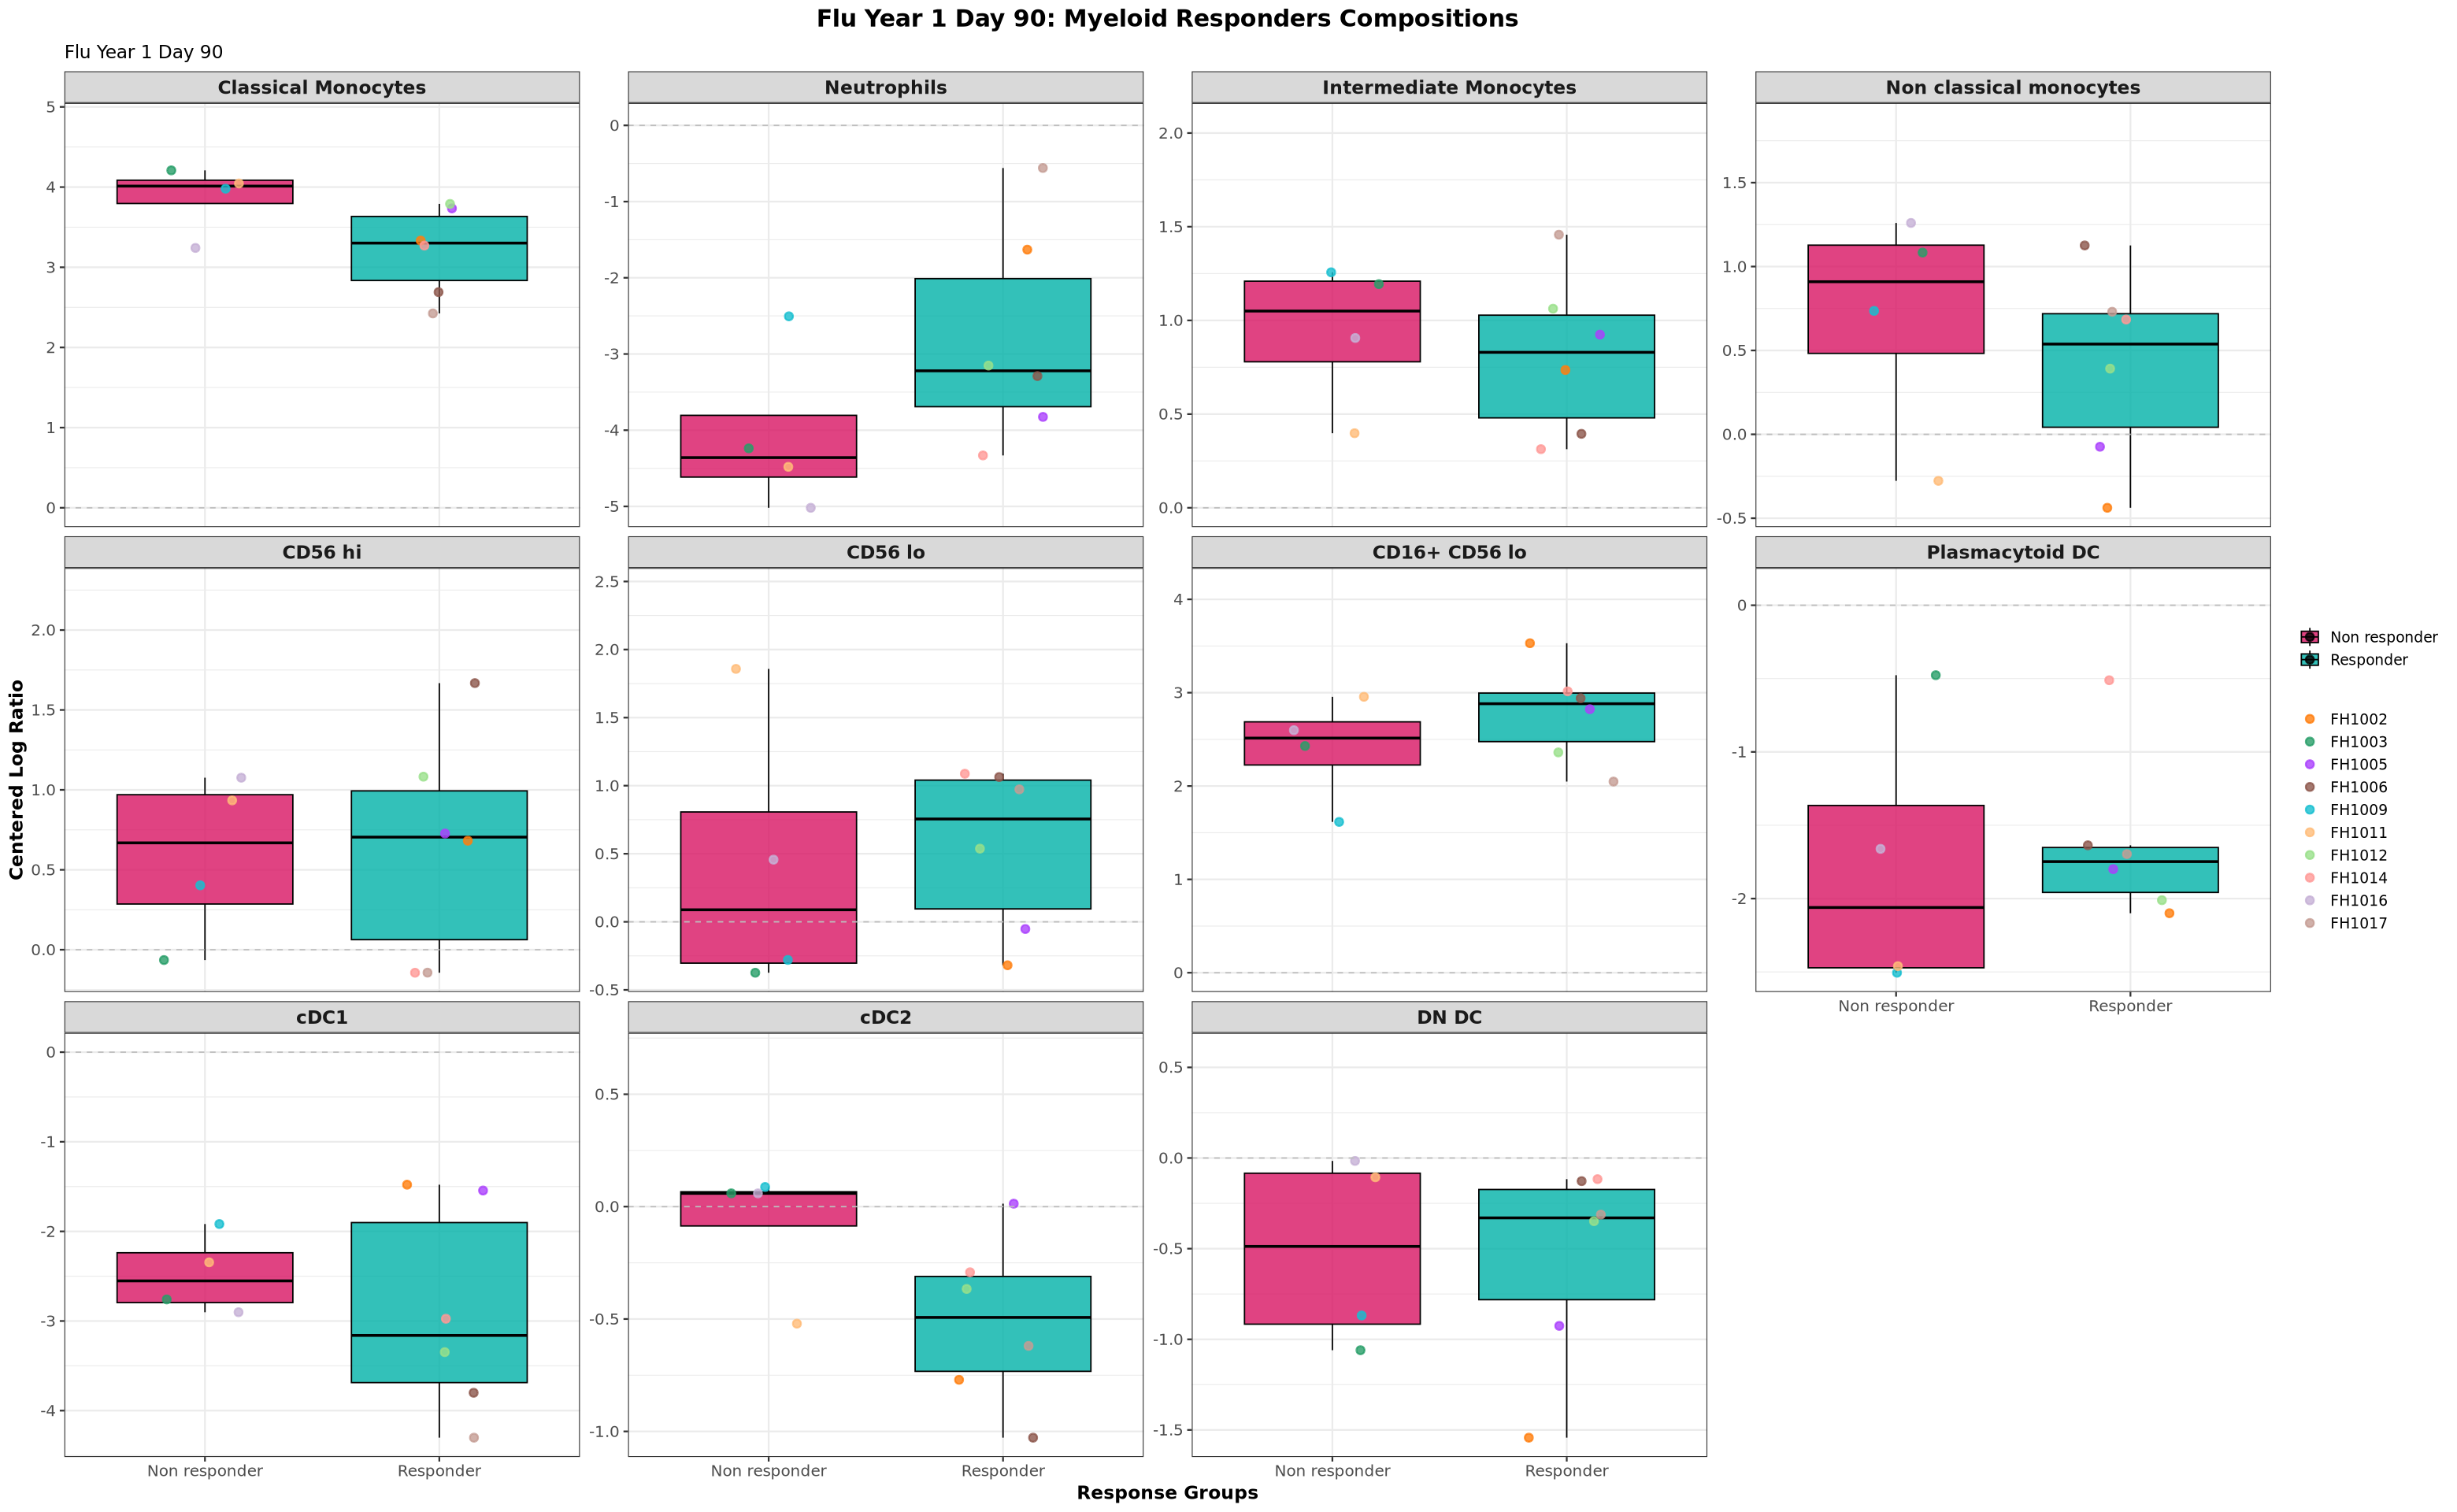


$`Flu Year 2 Day 0`


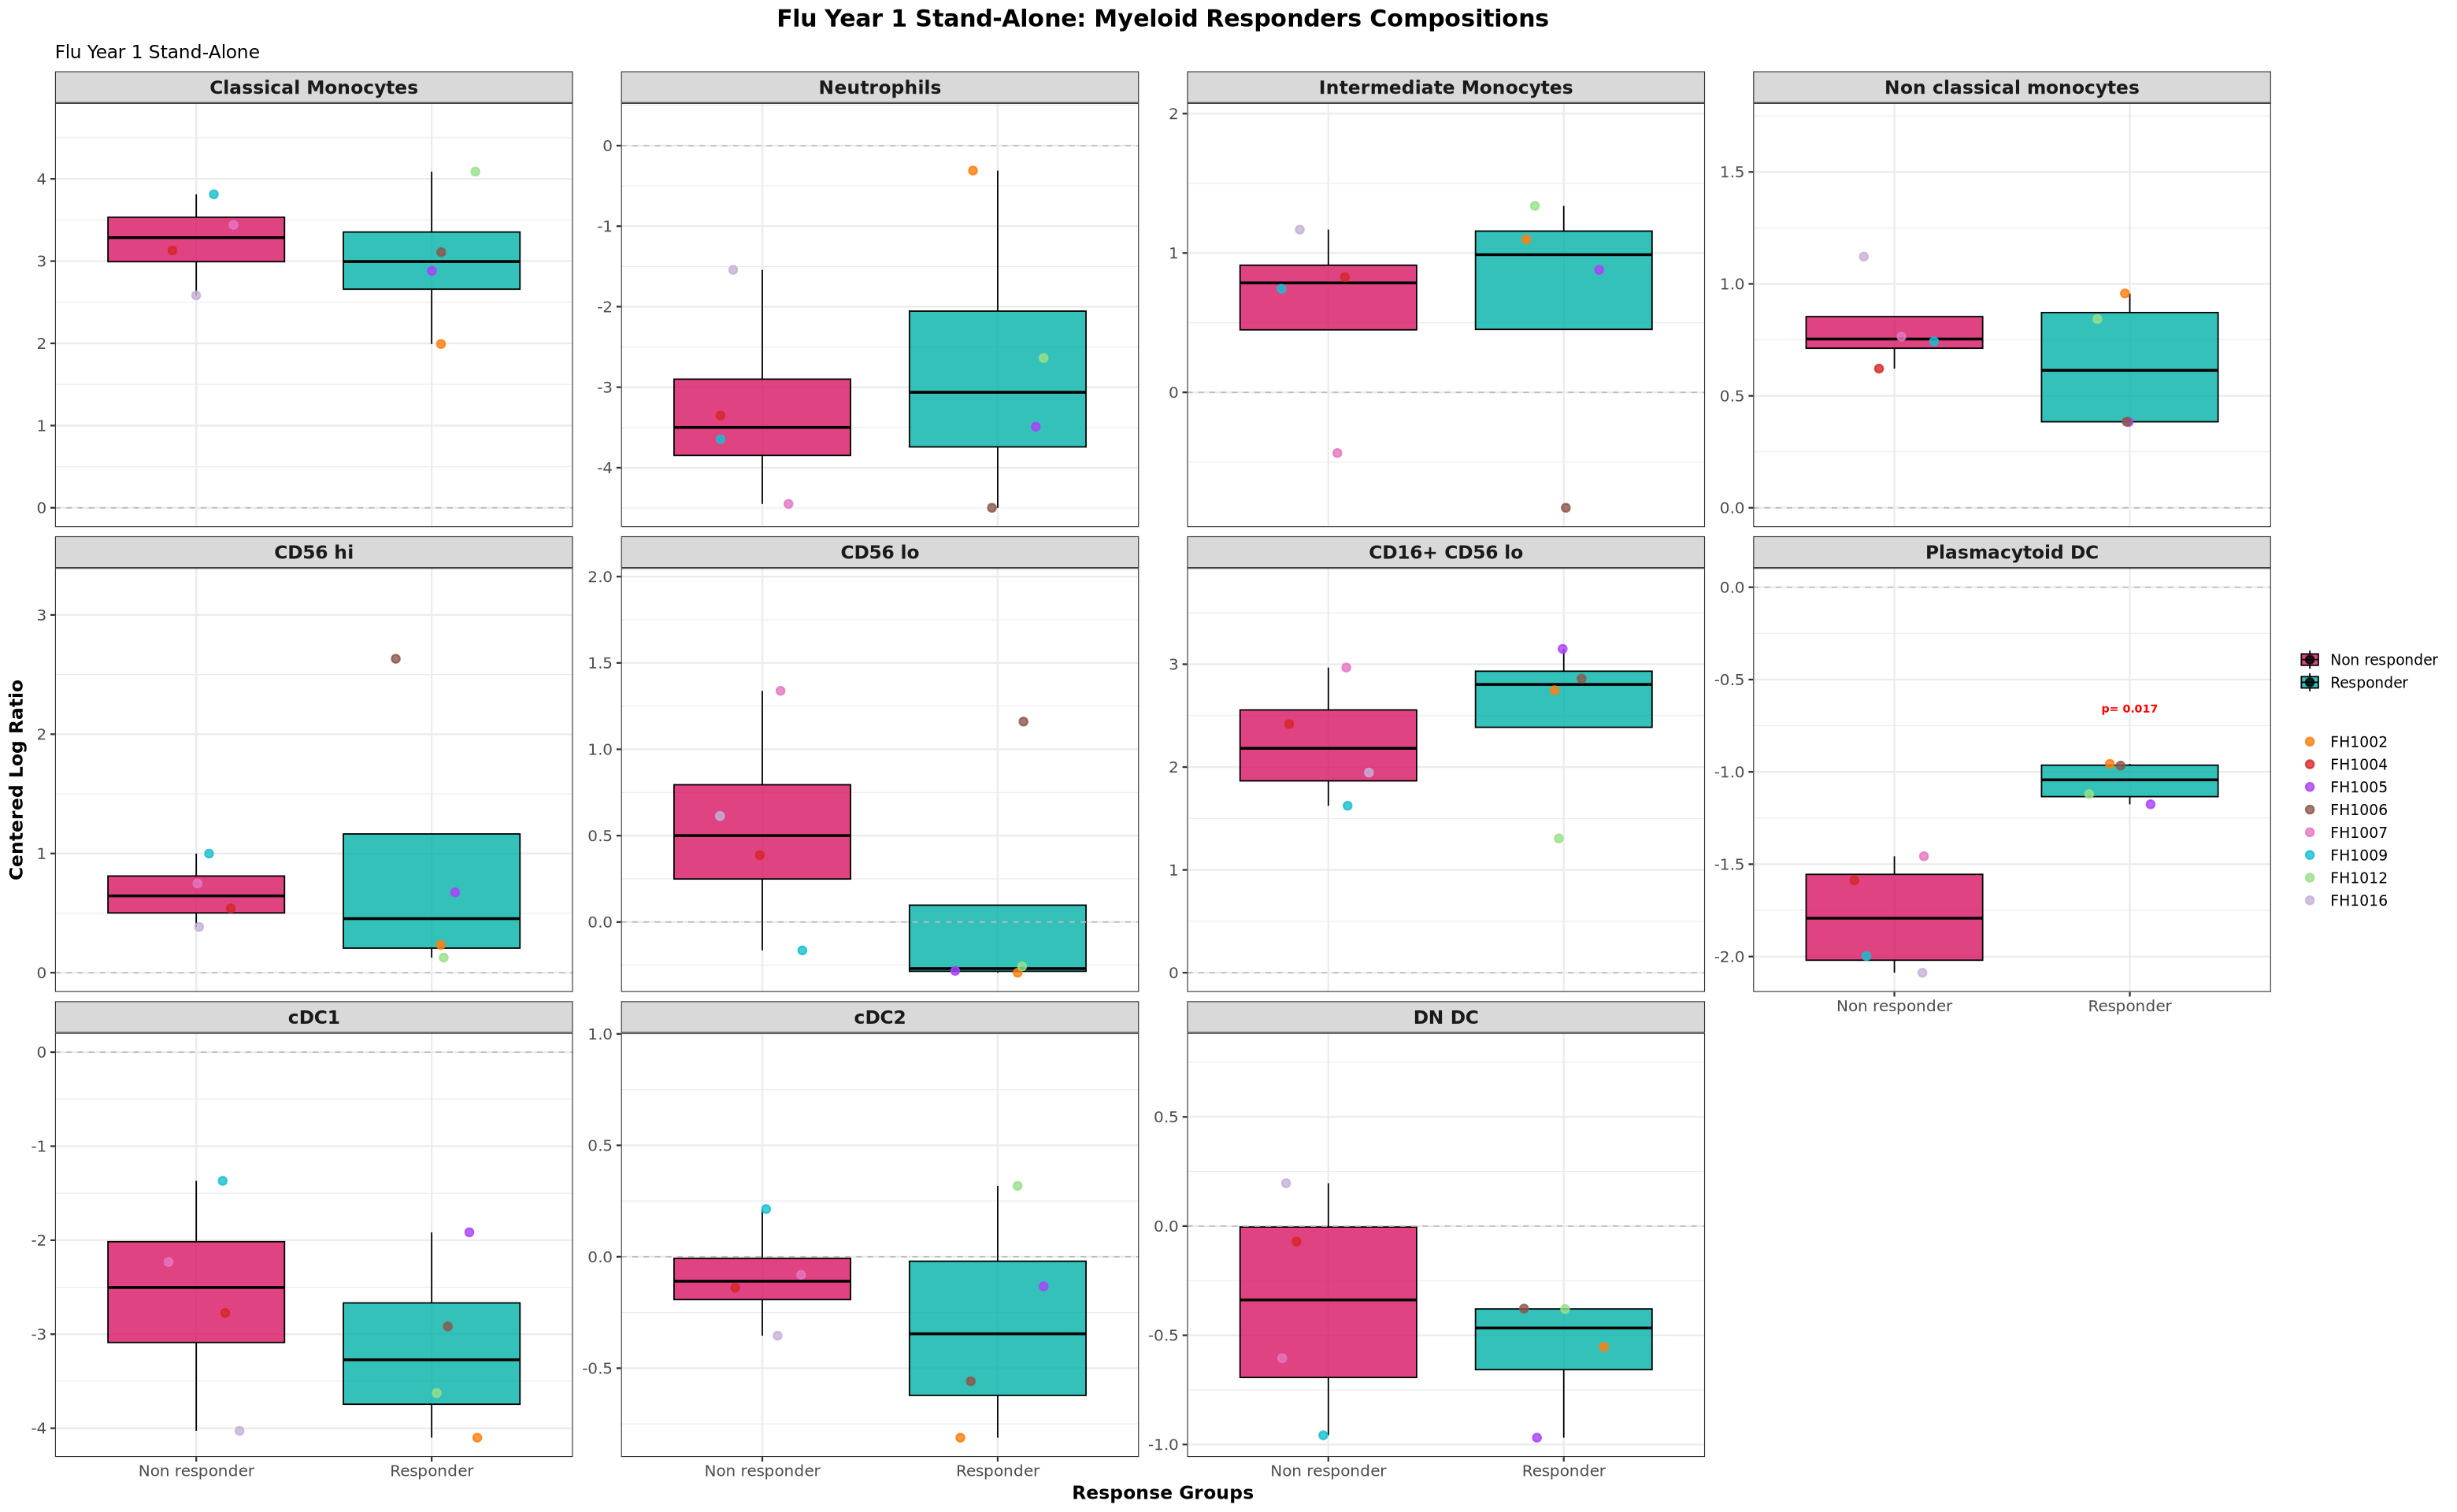


$`Flu Year 2 Day 7`


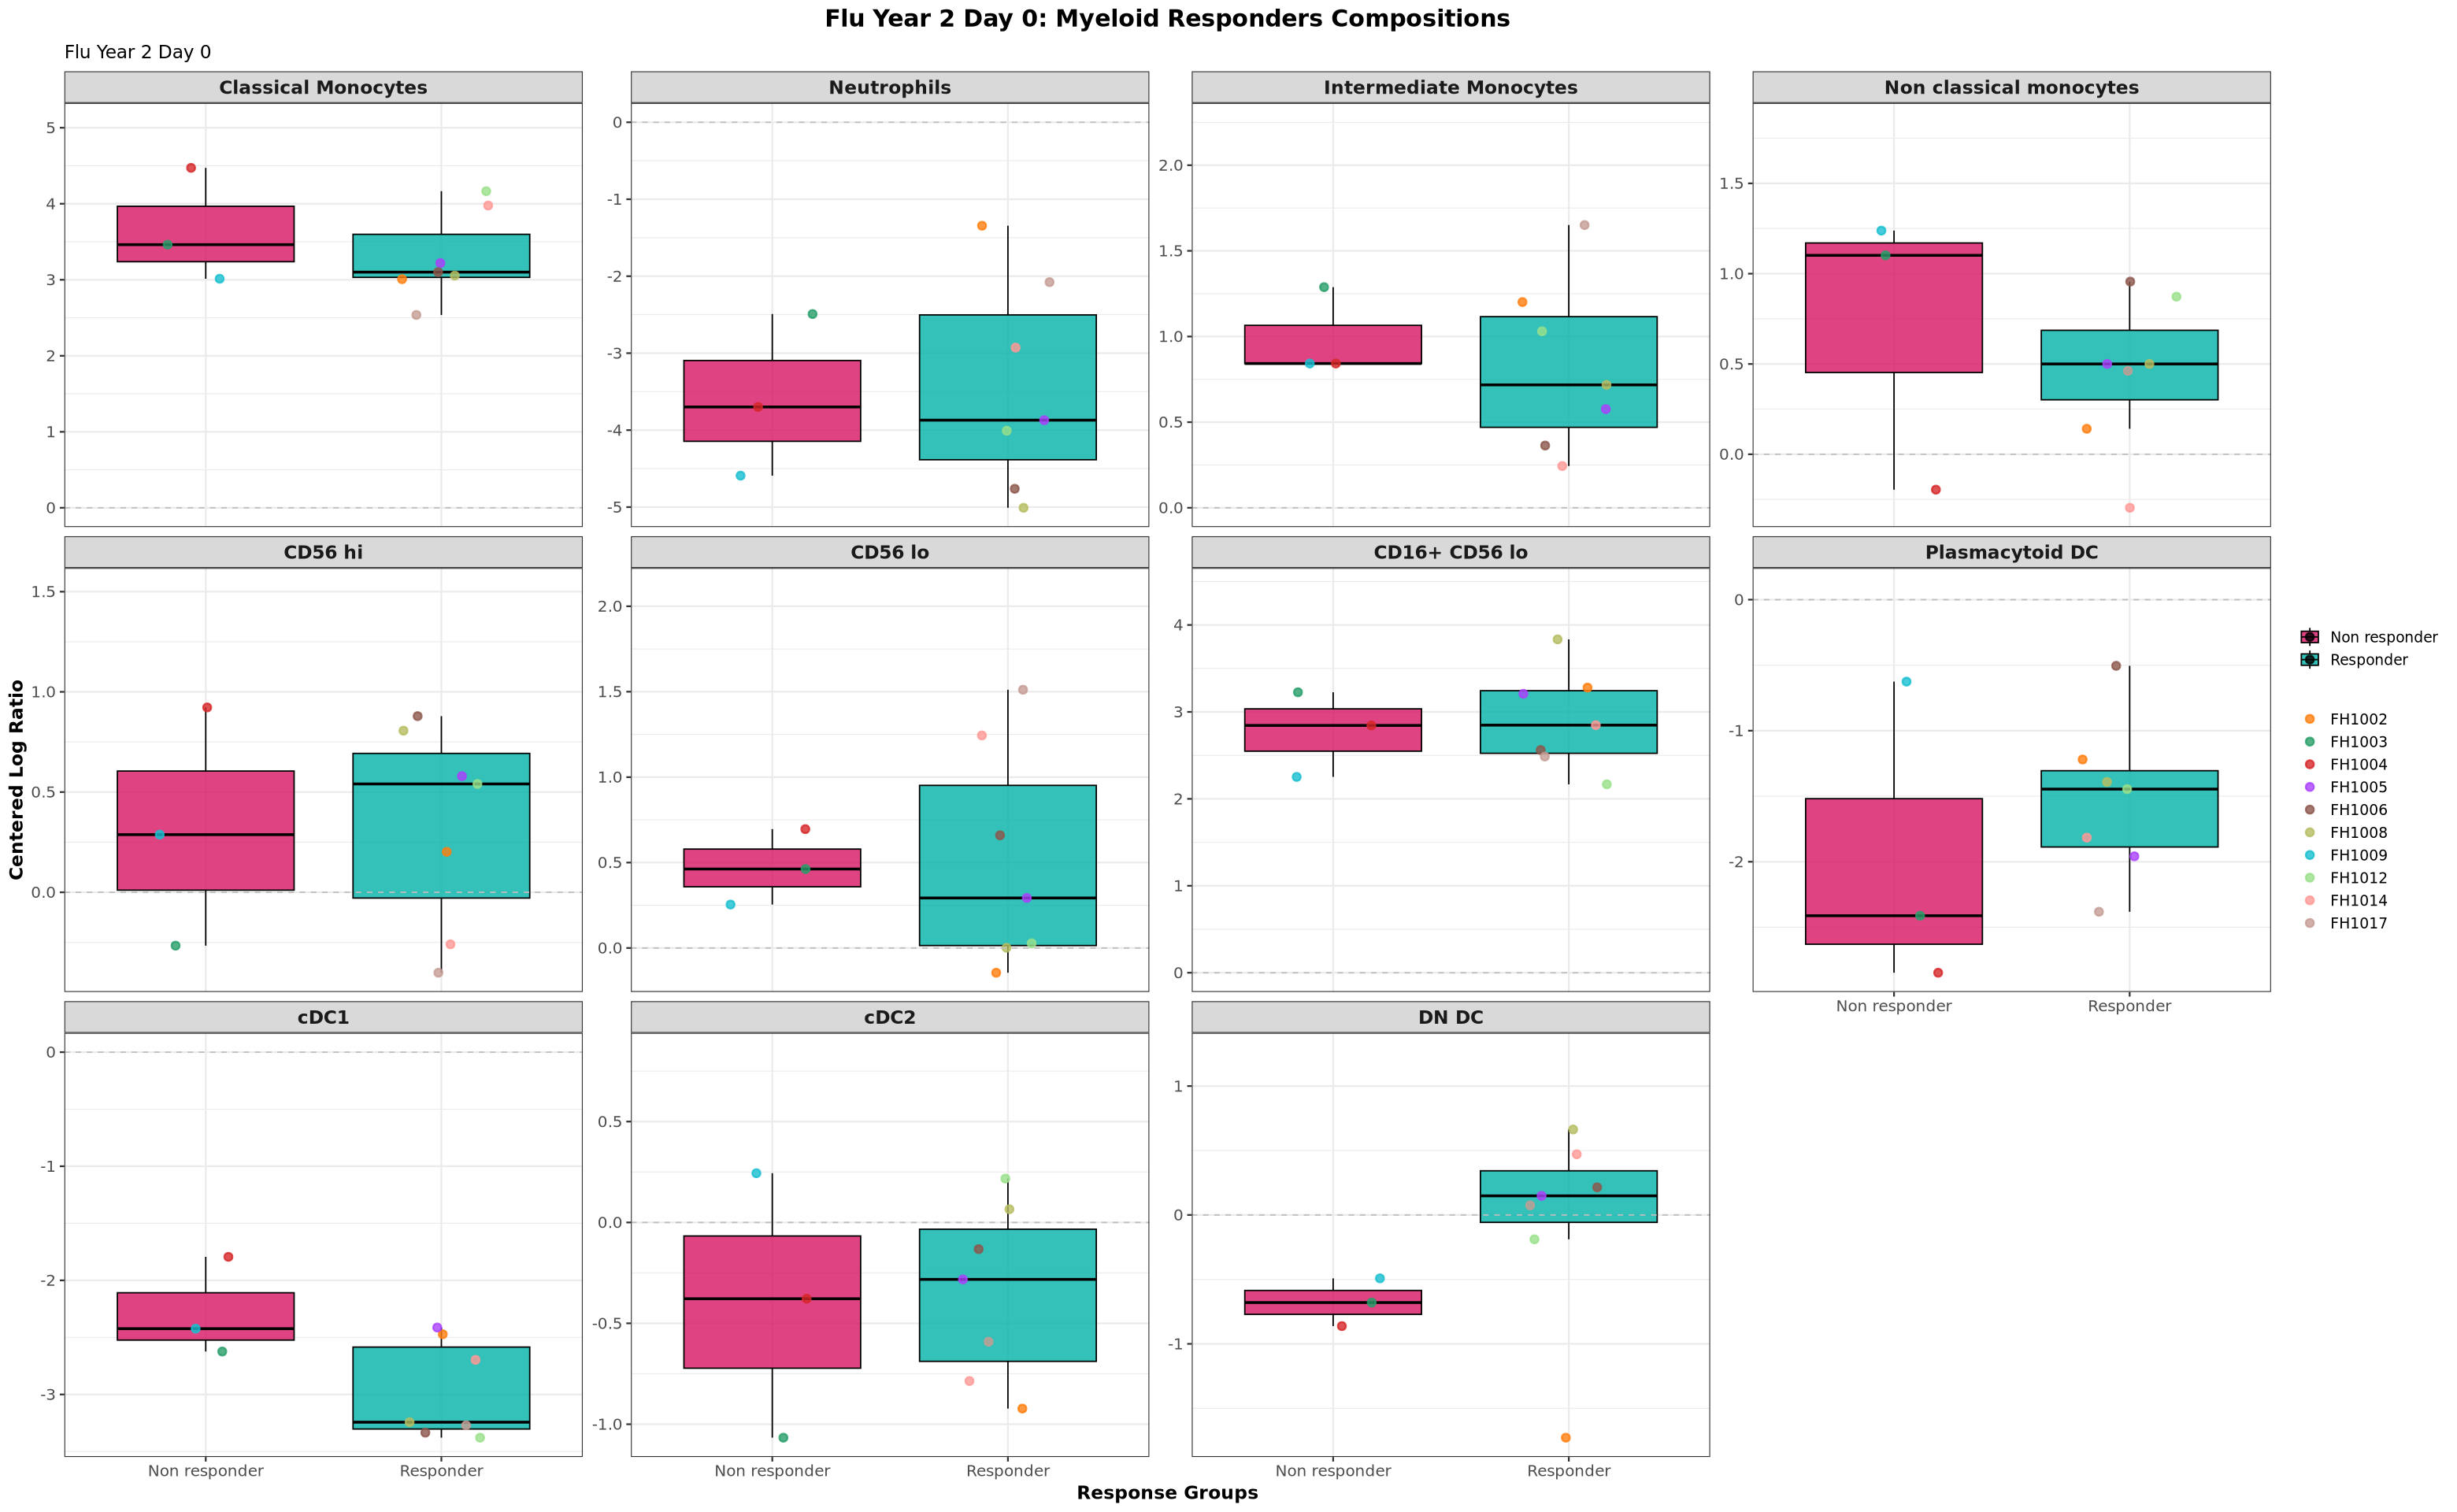


$`Flu Year 2 Stand-Alone`


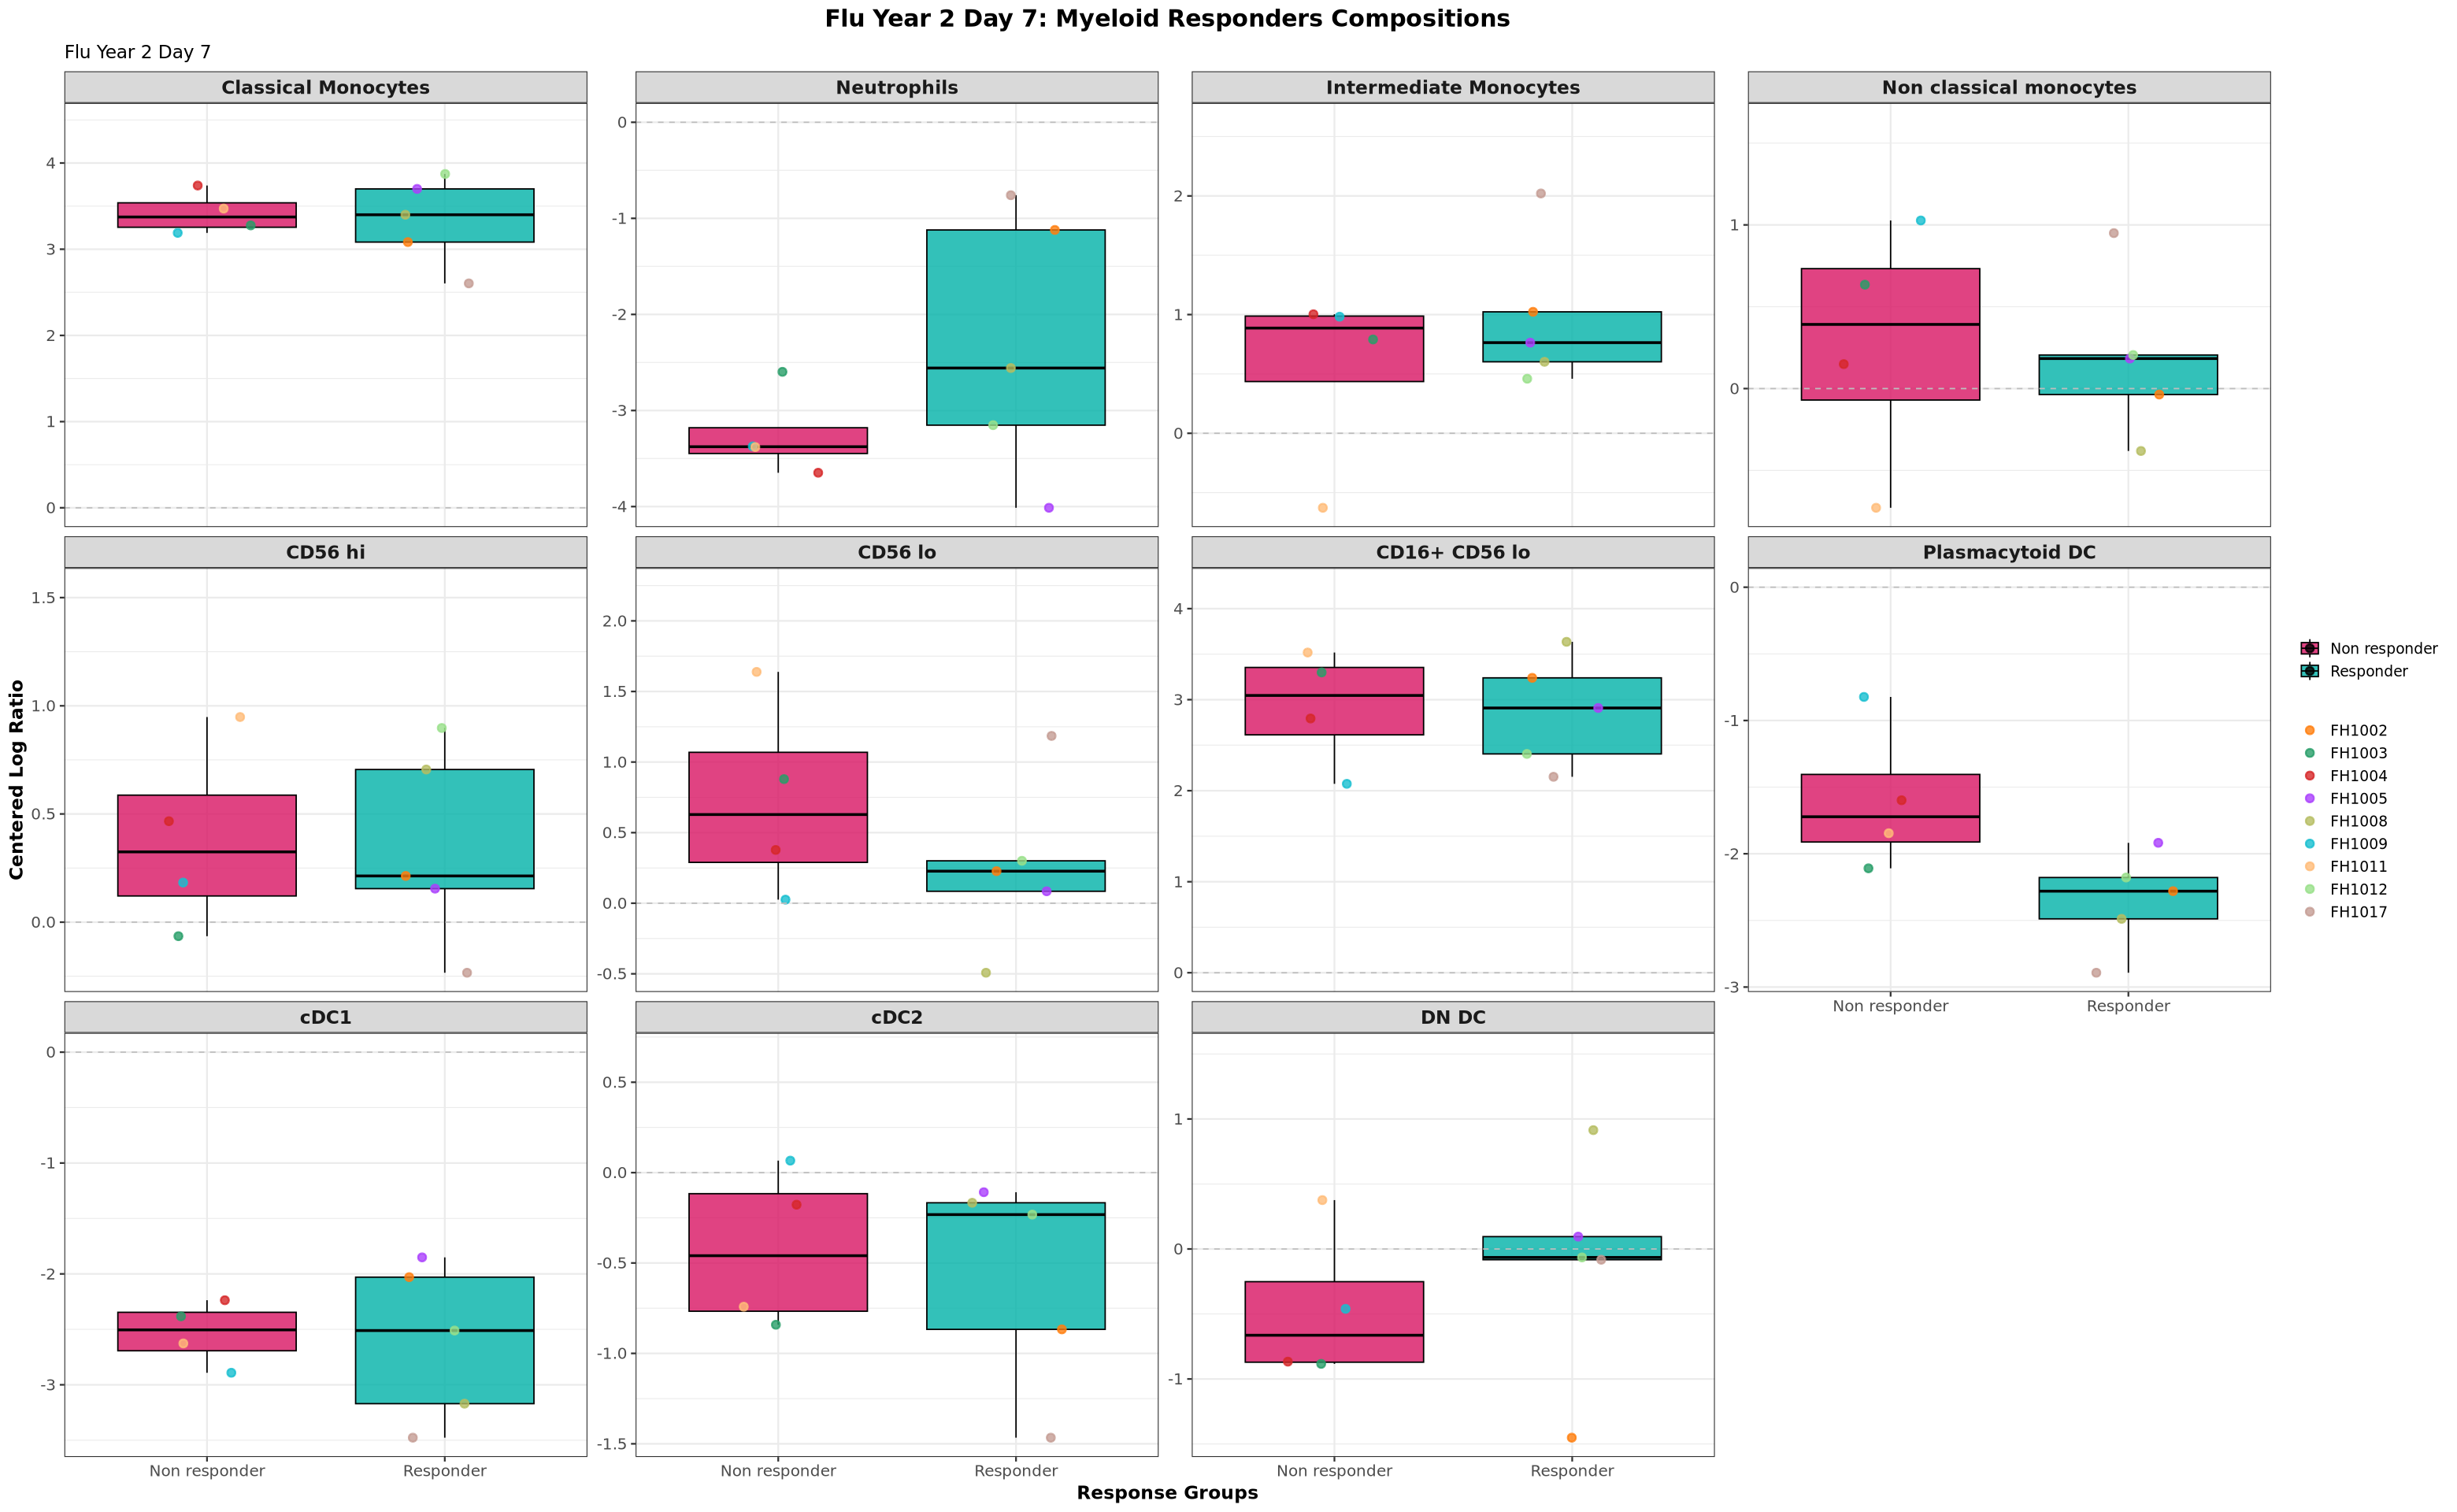


$`Flu Year 2 Day 90`


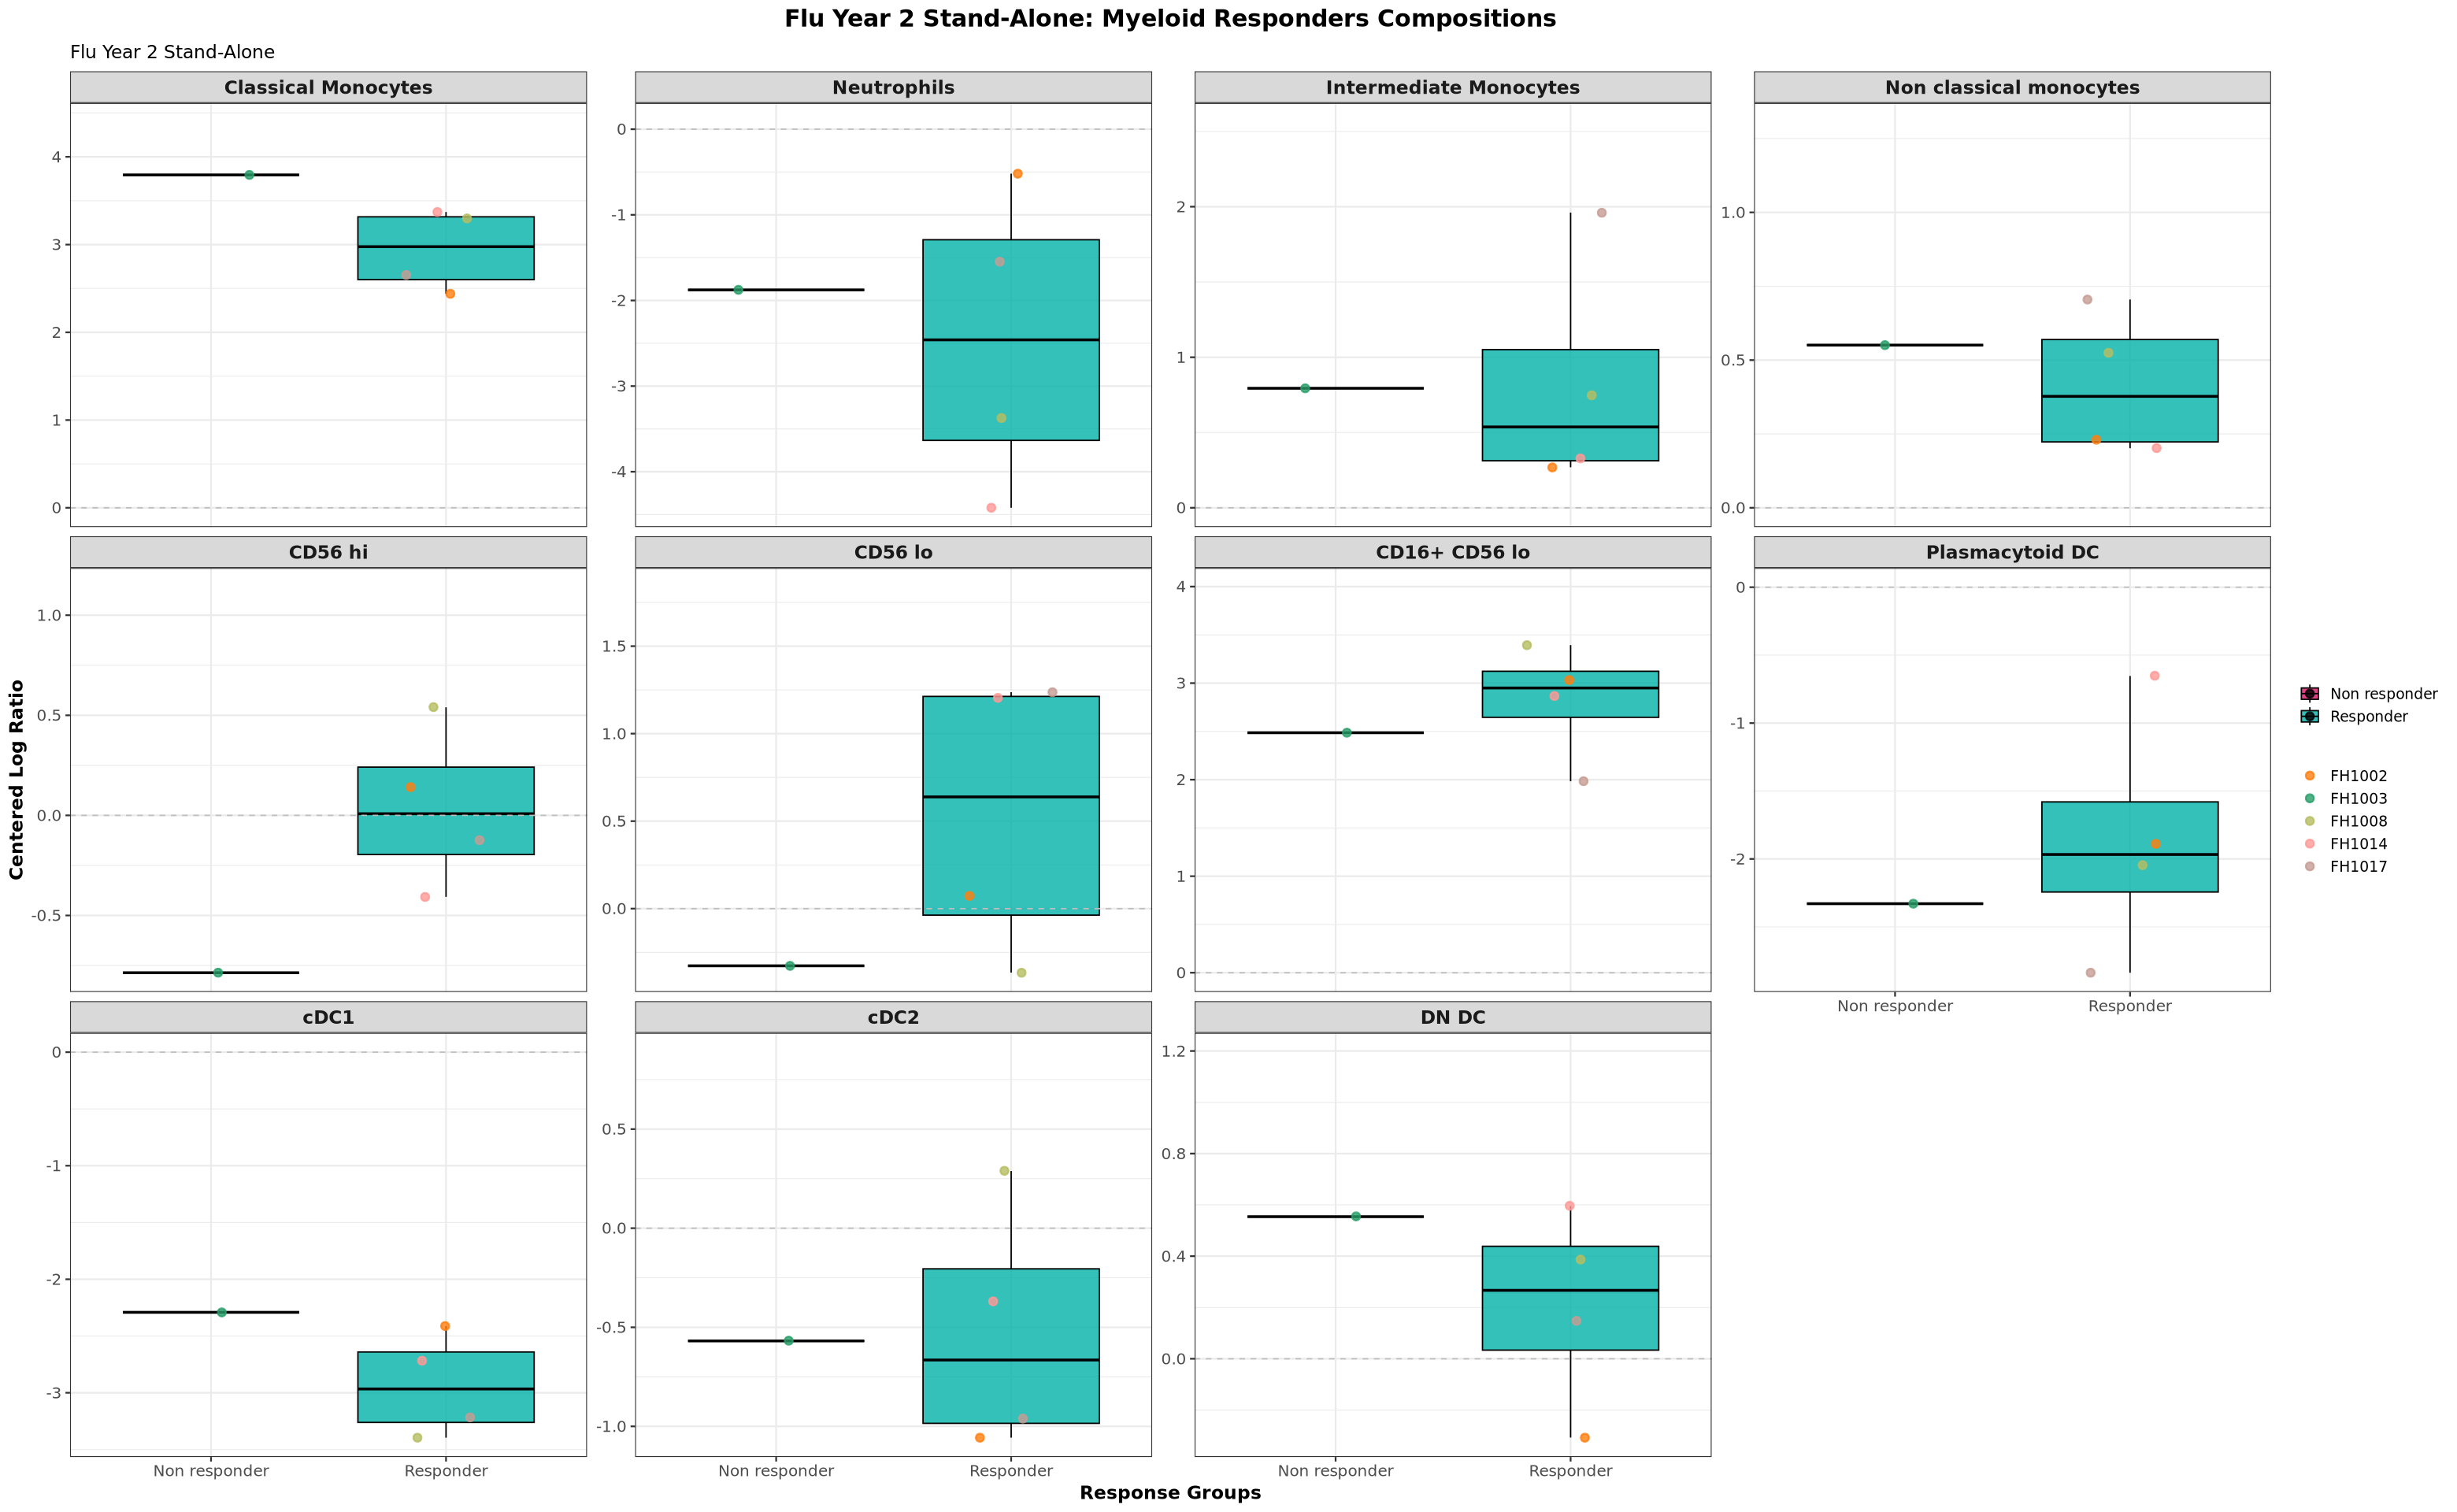

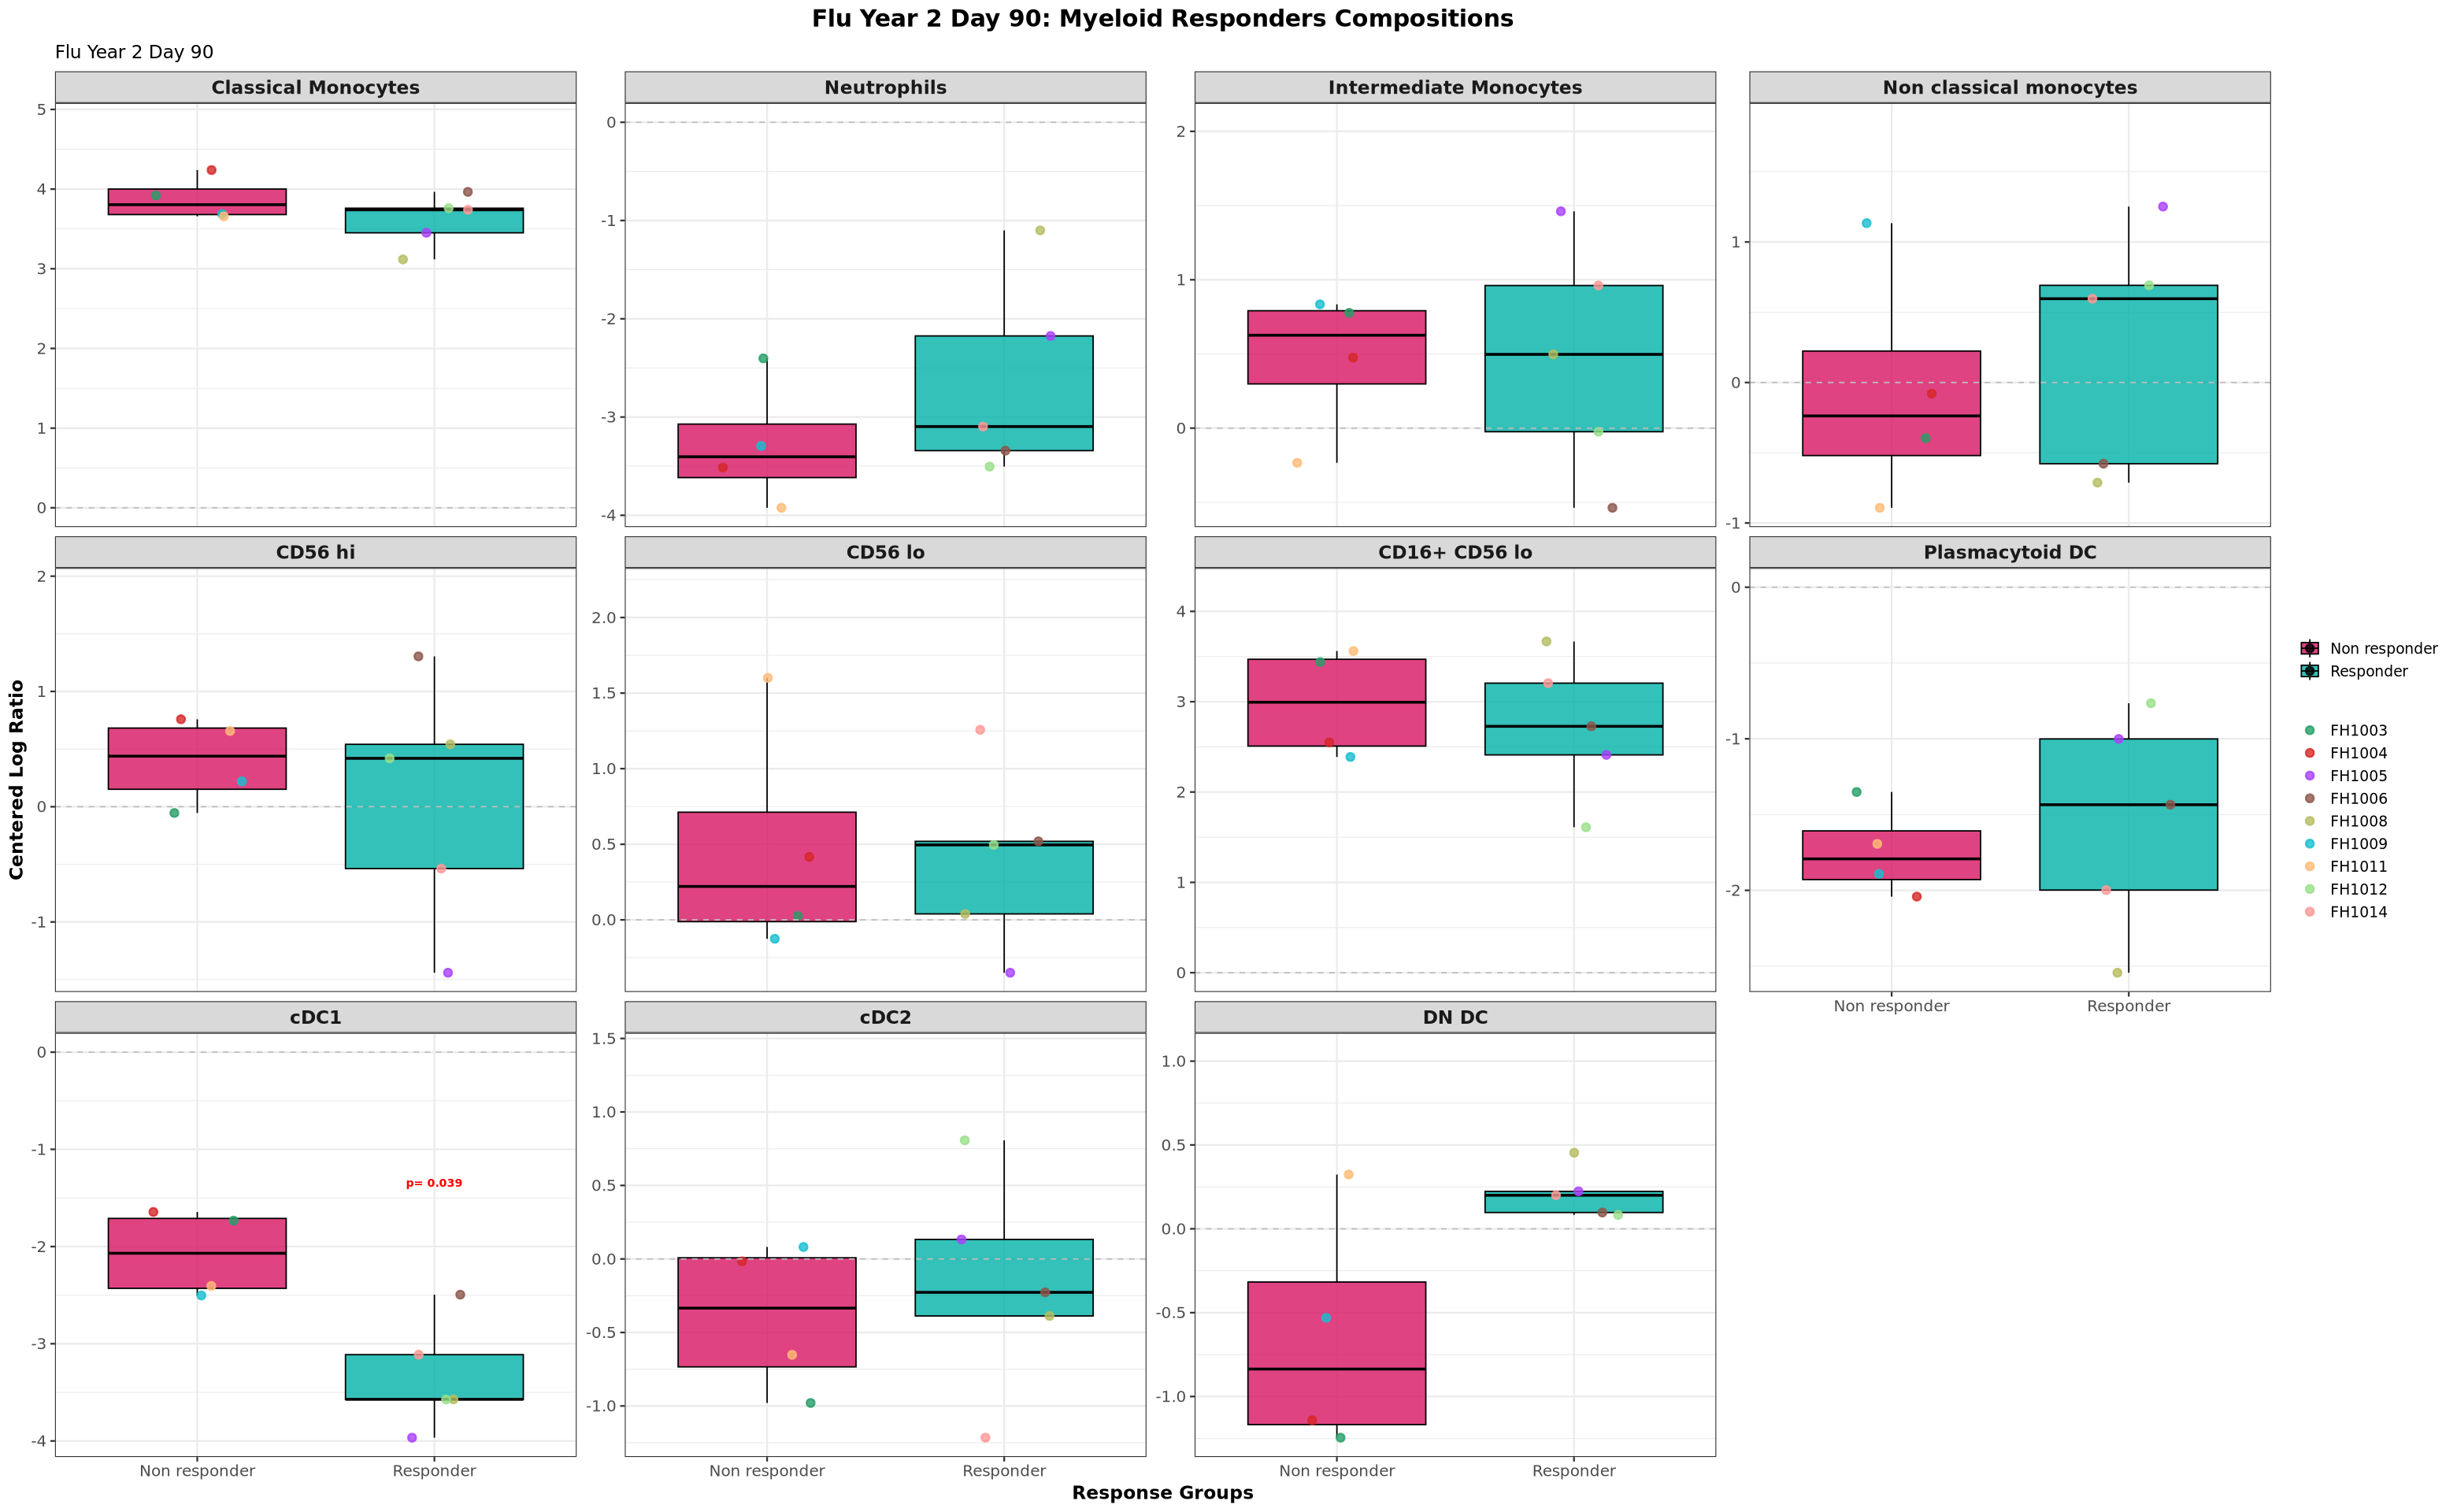

In [2]:
plots <- create_celltype_plots(
    result,
    plot_path,
    plot_title_prefix = "Myeloid Responders Compositions",
    filename_prefix = "myeloid_responder_composition",
    visit_var = "Visit"
)

print(plots)